In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

Load the dataset and display entries in the dataset


In [37]:
iris = pd.read_csv('IRIS.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# EXPLORATORY DATA ANALYSIS

## DATA PREPARATION


In [38]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
# Check for any missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [41]:
#Check for any duplicates within the databset
iris.duplicated().sum()

3

In [42]:
# Drop the duplicate values
iris = iris.drop_duplicates()
#verify that the duplicates have been dropped
iris.duplicated().sum()

0

## Data Visualization

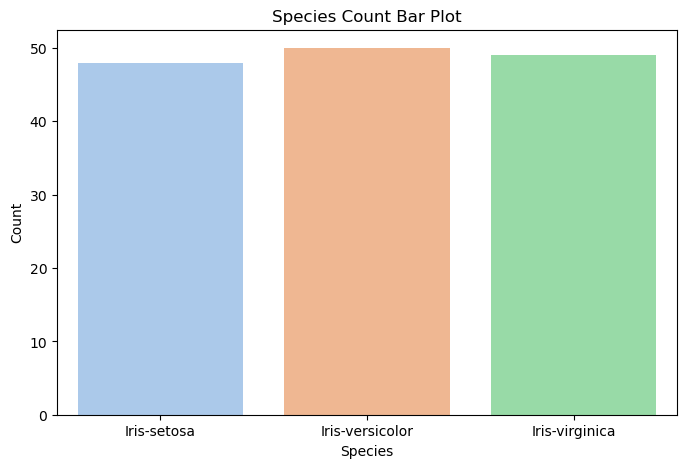

In [43]:
#Species count bar plot
plt.figure(figsize=(8, 5))
sns.countplot(data=iris, x='species', palette='pastel')
plt.title("Species Count Bar Plot")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

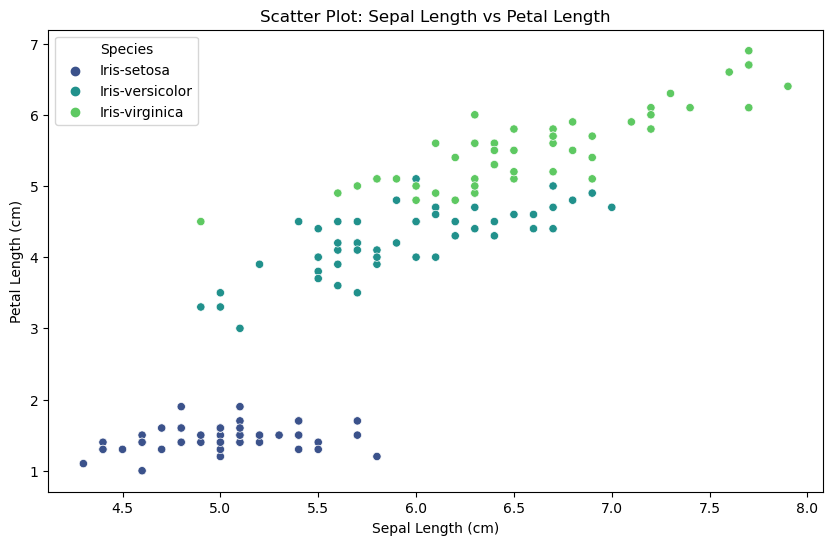

In [44]:
#Scatter plots for comparisons with species as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species', palette='viridis')
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()

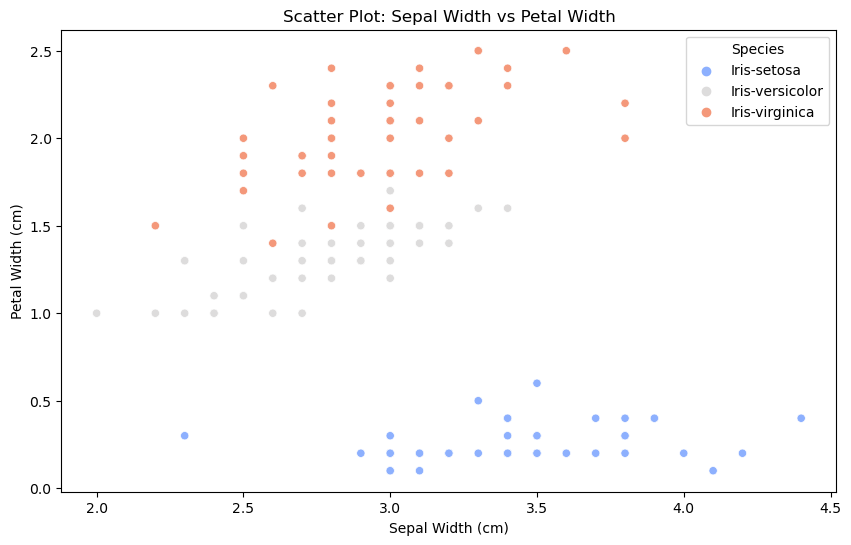

In [45]:
#Sepal Width vs Petal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='species', palette='coolwarm')
plt.title("Scatter Plot: Sepal Width vs Petal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Species")
plt.show()

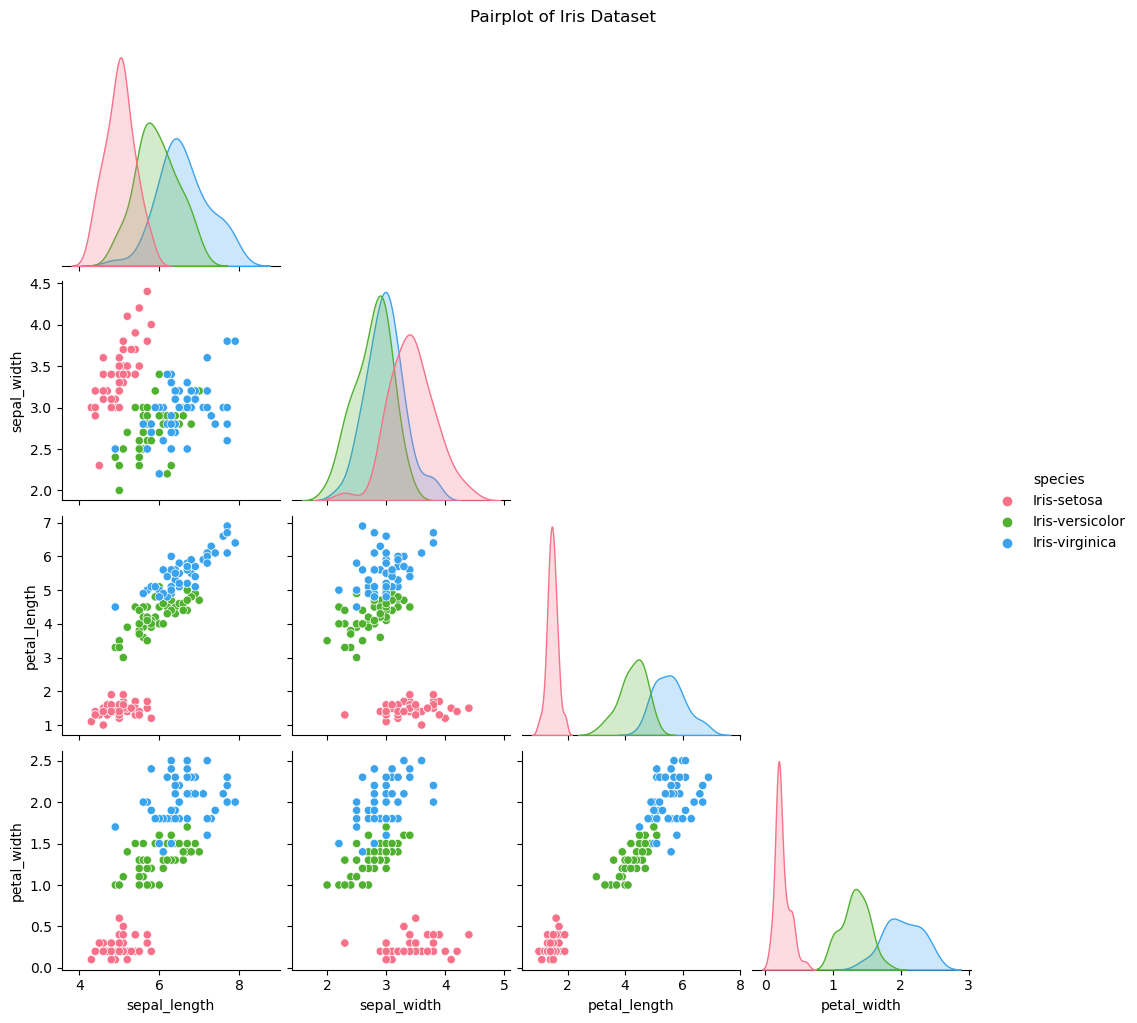

In [46]:
# Pairplot with species as hue
sns.pairplot(iris, hue='species', palette='husl', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

In [47]:


scaler = StandardScaler()
encoder = LabelEncoder()

numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

iris[numerical_columns] = scaler.fit_transform(iris[numerical_columns])

iris['species']= encoder.fit_transform(iris['species'])

In [48]:
#select the feature and target variables
y = iris['species']
X = iris[numerical_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [49]:
#Instantiate the Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Create predictions for the sets
X_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import classification_report

train_report = classification_report(y_train, X_pred)
test_report = classification_report(y_test, y_pred)

#display the results
print('The training report for the Logistic Regresion is:','\n',train_report, '\n')
print('The test reportfor the Logistic Regression is:', '\n', test_report)


The training report for the Logistic Regresion is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      0.97      0.97        40
           2       0.97      0.97      0.97        36

    accuracy                           0.98       110
   macro avg       0.98      0.98      0.98       110
weighted avg       0.98      0.98      0.98       110
 

The test reportfor the Logistic Regression is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.96        13

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



In [50]:

#instantiate and fit the Decisoin tree classifier on to the train and test sets
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
#Create the predictions for the train and test set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
#Create a classification report that will give the metrics for succes
clf_train_report = classification_report(y_train, y_train_pred)
clf_test_report = classification_report(y_test, y_test_pred)
#Print the results of theclassification report
print('The training report for Decision tree is:','\n',clf_train_report, '\n')
print('The test report for Decision tree is:', '\n', clf_test_report)

The training report for Decision tree is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        36

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110
 

The test report for Decision tree is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.82      0.90      0.86        10
           2       0.92      0.85      0.88        13

    accuracy                           0.92        37
   macro avg       0.91      0.92      0.91        37
weighted avg       0.92      0.92      0.92        37



In [51]:

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train,y_train)

svm_train_pred = svc.predict(X_train)
svm_test_pred = svc.predict(X_test)

svm_train_report = classification_report(y_train, svm_train_pred)
svm_test_report = classification_report(y_test, svm_test_pred)

print('The training report for SVM is:','\n',svm_train_report, '\n')
print('The test report for SVM tree is:', '\n', svm_test_report)

The training report for SVM is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      0.97      0.97        40
           2       0.97      0.97      0.97        36

    accuracy                           0.98       110
   macro avg       0.98      0.98      0.98       110
weighted avg       0.98      0.98      0.98       110
 

The test report for SVM tree is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        13

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37



In [52]:

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)

rfc_train_report = classification_report(y_train, rfc_train_pred)
rfc_test_report = classification_report(y_test, rfc_test_pred)

print('The training report for Random Forest Classifier is:','\n',rfc_train_report, '\n')
print('The test report for the Random Forest Classifier is:', '\n', rfc_test_report)

The training report for Random Forest Classifier is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        36

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110
 

The test report for the Random Forest Classifier is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        13

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37



In [53]:
#tune the Logistic regression model
#create a parameter grid for the regression
log_param = {'C':[0.01, 0.1, 1, 10, 100],
             'penalty':['l1', 'l2', 'elasticnet', None]}
#create a grid for these parameters
log_grid = GridSearchCV(estimator=logreg, param_grid=log_param, scoring='accuracy',cv=5, verbose=1) 
#Fit the grid searh model on the train data
log_grid.fit(X_train, y_train)
#Check o he best paramters
print('The best parameters are:','\n', log_grid.best_params_, '\n')
#Evaluate on the test data
log_tuned = log_grid.best_estimator_
y_log_tuned = log_tuned.predict(X_test)
log_report = classification_report(y_test, y_log_tuned)
print('The report for the tuned Logistic Regression is as follows:','\n',log_report)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
The best parameters are: 
 {'C': 0.01, 'penalty': None} 

The report for the tuned Logistic Regression is as follows: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.82      0.90      0.86        10
           2       0.92      0.92      0.92        13

    accuracy                           0.92        37
   macro avg       0.91      0.92      0.91        37
weighted avg       0.92      0.92      0.92        37



In [54]:
#Tune the parameters for the Decsioin Tree
#crate the parameter_grid
dt_param = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']}
#Perform the Grid Search
dt_grid = GridSearchCV(estimator=clf, param_grid=dt_param,scoring='accuracy', cv = 5, verbose=1)
#fit the grid onto the train sets
dt_grid.fit(X_train, y_train)
#Show the best parameters 
print('The best parameters are:','\n', dt_grid.best_params_, '\n')
#Evaluate on the test data
dt_tuned = dt_grid.best_estimator_
y_dt_tuned = dt_tuned.predict(X_test)
dt_report = classification_report(y_test, y_dt_tuned)
print('The report for the tuned Decision tree with best estimators is as follows:','\n',dt_report)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
The best parameters are: 
 {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2} 

The report for the tuned Decision tree with best estimators is as follows: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.83      1.00      0.91        10
           2       1.00      0.85      0.92        13

    accuracy                           0.95        37
   macro avg       0.94      0.95      0.94        37
weighted avg       0.95      0.95      0.95        37



In [55]:
#tune the parameters for the RandomForest models
#Create the parameters for the grid search
rfc_param = {'n_estimators':[50, 100, 200],
             'max_depth':[10, 20, 30],
             'min_samples_split':[2,5,10],
             'min_samples_leaf':[1, 2, 4],
             'max_features':['sqrt', 'log2', None]}
#create the grid 
rfc_grid = GridSearchCV(estimator= rfc, param_grid=rfc_param, scoring = 'accuracy', cv = 5, verbose = 1)
#fit the grid onto the traon sets
rfc_grid.fit(X_train, y_train)
#show the best parameters
print('The best parameters are:', '\n', rfc_grid.best_params_, '\n')
#Evaluate on the test data
rfc_tuned = rfc_grid.best_estimator_
y_rfc_tuned = rfc_tuned.predict(X_test)
#Create a classification report to view the metrics of the tuned model
rfc_report = classification_report(y_test, y_rfc_tuned)
print('The report for the tuned Random Forest Classiffier with best estimators is as follows:','\n',rfc_report)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
The best parameters are: 
 {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50} 

The report for the tuned Random Forest Classiffier with best estimators is as follows: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        13

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37



In [56]:
#Tune the parameters for the SVM model
#create t parameter grid
svm_param = {"C":[0.1, 1, 10,100],
             'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma':['scale', 'auto'],
             'degree':[2, 3, 4],
             'coef0':[0.0, 0.5, 1]}

svm_grid = GridSearchCV(estimator=svc, param_grid=svm_param, scoring='accuracy', cv = 3, verbose =1)
#fit the grid onto the train sets
svm_grid.fit(X_train, y_train)
#Show the best parameters 
print('The best parameters are:','\n', svm_grid.best_params_, '\n')
#Evaluate on the test data
svm_tuned = svm_grid.best_estimator_
y_svm_tuned = svm_tuned.predict(X_test)
svm_report = classification_report(y_test, y_svm_tuned)
print('The report for the tuned SVM with best estimators is as follows:','\n',svm_report)


Fitting 3 folds for each of 288 candidates, totalling 864 fits
The best parameters are: 
 {'C': 1, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'} 

The report for the tuned SVM with best estimators is as follows: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.96        13

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



### 1. **Logistic Regression**
- **Training Report**: Excellent results with high precision, recall, and F1-scores for all classes. Accuracy is 98%, indicating good fit on the training data.
- **Test Report**: Maintains high accuracy (97%) with some slight drops in recall and F1 for class `1`. Precision and recall for other classes remain strong.

**Insights**:
- The model generalizes well, showing consistent performance across training and testing sets.
- Slight overfitting is possible, as training performance is higher than testing.


### 2. **Decision Tree**
- **Training Report**: Perfect scores (100% across all metrics), indicative of overfitting.
- **Test Report**: Accuracy drops to 92%, with class `1` showing reduced precision and recall (precision: 0.82, recall: 0.90).

**Insights**:
- The Decision Tree is likely overfitting due to its ability to memorize training data. This is evident from the drop in performance on unseen data.
- Hyperparameter tuning is necessary to reduce overfitting.


### 3. **Support Vector Machine (SVM)**
- **Training Report**: Similar to Logistic Regression, high accuracy (98%) with strong metrics for all classes.
- **Test Report**: Accuracy is slightly lower at 95%, with balanced performance across all classes.

**Insights**:
- SVM shows a good balance between training and testing performance, suggesting it is not overfitting.
- Consistent metrics across classes indicate the model is reliable.


### 4. **Random Forest Classifier**
- **Training Report**: Perfect scores, indicating overfitting.
- **Test Report**: Accuracy is 95%, with slight dips in precision and recall for class `1` (precision: 0.90, recall: 0.90).

**Insights**:
- Like the Decision Tree, Random Forest overfits on the training data but still performs well on the test set.
- Hyperparameter tuning is crucial to improve generalization.


### 5. **Tuned Logistic Regression**
- **Best Parameters**: `{ 'C': 0.01, 'penalty': None }`
- **Report**: Accuracy drops to 92%, with reduced performance in class `1` (precision: 0.82, recall: 0.90).

**Insights**:
- Regularization (`C=0.01`) helps reduce overfitting but slightly impacts performance.
- The trade-off between bias and variance is evident, with more balanced metrics but slightly lower accuracy.


### 6. **Tuned Decision Tree**
- **Best Parameters**: `{ 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2 }`
- **Report**: Accuracy improves to 95%, with significant gains in generalization compared to the untuned version.

**Insights**:
- Limiting tree depth and optimizing split criteria mitigates overfitting.
- The model now generalizes better, with balanced metrics across all classes.


### 7. **Tuned Random Forest**
- **Best Parameters**: `{ 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50 }`
- **Report**: Accuracy remains 95%, with improved balance across classes.

**Insights**:
- Hyperparameter tuning reduces overfitting and maintains high performance.
- The model shows strong generalization and stability.


### 8. **Tuned SVM**
- **Best Parameters**: `{ 'C': 1, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly' }`
- **Report**: Accuracy remains 97%, with slightly better precision and recall for all classes.

**Insights**:
- The tuned SVM exhibits excellent generalization and performance consistency.
- The polynomial kernel captures complex patterns in the data effectively.


### Overall Observations:
1. **Untuned Models**:
   - Logistic Regression and SVM show strong generalization and balanced performance.
   - Decision Tree and Random Forest suffer from overfitting due to their flexibility in memorizing training data.

2. **Tuned Models**:
   - Tuning improves the generalization of Decision Tree and Random Forest significantly.
   - Logistic Regression and SVM maintain high performance with minor improvements.

3. **Model Recommendations**:
   - **SVM**: Best overall performance with minimal overfitting (97% accuracy on test set).
   - **Tuned Random Forest**: Reliable performance and good balance (95% accuracy).
   - Avoid untuned Decision Tree or Random Forest for deployment due to overfitting risks.